In [1]:
import os
import sys

# Data science packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn utility classes & functions
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Scikit Learn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
                              RandomForestRegressor)
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), '../'))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from src.data.player_data import player_data
from src.model.metrics import measure_estimators, regression_accuracy

np.random.seed(42)

# Get player ratings

In [2]:
player_df = player_data(aggregate=False, prev_match_stats=False).astype({'player_id': 'category'})
player_df

/usr/local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/usr/local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Returning data from 1965-01-01 to 2016-12-31

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Finished getting afltables data

  warnings.warn(x, RRuntimeWarning)


,at_home,behinds,bounces,clangers,clearances,contested_marks,contested_possessions,cum_games_played,frees_against,frees_for,...,oppo_team,player_id,rebounds,round_number,score,tackles,team,time_on_ground,uncontested_possessions,year
id,,,,,,,,,,,,,,,,,,,,,
1000108421995,1,1.000000,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,...,Adelaide,1000,0.000000,5,144,1.000000,Sydney,0.0,0.0,1995
1000108591995,1,0.500000,0.0,0.0,0.000000,0.0,0.0,3,1.250000,0.500000,...,Carlton,1000,0.000000,8,132,2.000000,Sydney,0.0,0.0,1995
1000108721995,1,0.400000,0.0,0.0,0.000000,0.0,0.0,4,1.000000,0.400000,...,Richmond,1000,0.000000,9,90,2.400000,Sydney,0.0,0.0,1995
1000109041995,1,0.333333,0.0,0.0,0.000000,0.0,0.0,8,0.777778,0.222222,...,Essendon,1000,0.000000,13,138,1.777778,Sydney,0.0,0.0,1995
1000109111995,1,0.400000,0.0,0.0,0.000000,0.0,0.0,9,0.700000,0.200000,...,St Kilda,1000,0.000000,14,94,1.600000,Sydney,0.0,0.0,1995
1000110021996,1,0.461538,0.0,0.0,0.000000,0.0,0.0,12,0.846154,0.461538,...,Fremantle,1000,0.000000,2,71,1.307692,Sydney,0.0,0.0,1996
1000110081996,1,0.428571,0.0,0.0,0.000000,0.0,0.0,13,0.785714,0.428571,...,Collingwood,1000,0.000000,3,107,1.214286,Sydney,0.0,0.0,1996
1000110251996,1,0.437500,0.0,0.0,0.000000,0.0,0.0,15,1.062500,0.375000,...,Hawthorn,1000,0.000000,5,88,1.250000,Sydney,0.0,0.0,1996
1000110281996,1,0.411765,0.0,0.0,0.000000,0.0,0.0,16,1.117647,0.470588,...,Essendon,1000,0.000000,6,90,1.294118,Sydney,0.0,0.0,1996


In [3]:
PLAYER_STATS = ['kicks', 'marks', 'handballs', 'goals', 'behinds', 'hit_outs', 'tackles',
              'rebounds', 'inside_50s', 'clearances', 'clangers', 'frees_for',
              'frees_against', 'contested_possessions',
              'uncontested_possessions', 'contested_marks', 'marks_inside_50',
              'one_percenters', 'bounces', 'goal_assists', 'time_on_ground']
INDEX_COLS = ['team', 'year', 'round_number']

def oppo_features(data_frame):
    oppo_col_names = {col_name: f'oppo_{col_name}' for col_name in PLAYER_STATS}
    column_translations = {**{'oppo_team': 'team'}, **oppo_col_names}

    return (data_frame
            .loc[:, ['year', 'round_number', 'oppo_team'] + PLAYER_STATS]
            # We switch out oppo_team for team in the index,
            # then assign feature as oppo_{feature_column}
            .rename(columns=column_translations)
            .set_index(INDEX_COLS)
            .sort_index()
            .loc[:, oppo_col_names.values()])

agg_player_df = player_data(aggregate=True, prev_match_stats=False)
oppo_match_df = pd.concat([agg_player_df, oppo_features(agg_player_df)], axis=1)
oppo_match_df

team  year  round_number  \
team             year round_number                                         
Adelaide         1991 1                     Adelaide  1991             1   
                      2                     Adelaide  1991             2   
                      3                     Adelaide  1991             3   
                      4                     Adelaide  1991             4   
                      5                     Adelaide  1991             5   
                      6                     Adelaide  1991             6   
                      7                     Adelaide  1991             7   
                      9                     Adelaide  1991             9   
                      10                    Adelaide  1991            10   
                      11                    Adelaide  1991            11   
                      12                    Adelaide  1991            12   
                      13                    Adelaide  1991            13   
                      14                    Adelaide  1991            14   
                      15                    Adelaide  1991            15   
                      16                    Adelaide  1991            16   
                      17                    Adelaide  1991            17   
                      18                    Adelaide  1991            18   
                      19                    Adelaide  1991            19   
                      20                    Adelaide  1991            20   
                      21                    Adelaide  1991            21   
                      22                    Adelaide  1991            22   
                      24                    Adelaide  1991            24   
                 1992 1                     Adelaide  1992             1   
                      3                     Adelaide  1992             3   
                      4                     Adelaide  1992             4   
                      5                     Adelaide  1992             5   
                      6                     Adelaide  1992             6   
                      7                     Adelaide  1992             7   
                      8                     Adelaide  1992             8   
                      9                     Adelaide  1992             9   
...                                              ...   ...           ...   
Western Bulldogs 2015 21            Western Bulldogs  2015            21   
                      22            Western Bulldogs  2015            22   
                      23            Western Bulldogs  2015            23   
                      24            Western Bulldogs  2015            24   
                 2016 1             Western Bulldogs  2016             1   
                      2             Western Bulldogs  2016             2   
                      3             Western Bulldogs  2016             3   
                      4             Western Bulldogs  2016             4   
                      5             Western Bulldogs  2016             5   
                      6             Western Bulldogs  2016             6   
                      7             Western Bulldogs  2016             7   
                      8             Western Bulldogs  2016             8   
                      9             Western Bulldogs  2016             9   
                      10            Western Bulldogs  2016            10   
                      11            Western Bulldogs  2016            11   
                      12            Western Bulldogs  2016            12   
                      13            Western Bulldogs  2016            13   
                      15            Western Bulldogs  2016            15   
                      16            Western Bulldogs  2016            16   
                      17            Western Bulldogs  2016            17   
                    

In [4]:
model_df = (player_df
            .reset_index()
            .merge(oppo_match_df,
                on=['team', 'year', 'round_number', 'oppo_team', 'at_home', 'score', 'oppo_score'],
                how='left',
                suffixes=('', '_by_team'))
            .set_index('id')
            .dropna())
model_df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'team' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'round_number' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  
/usr/local/lib/python3.6/site-packages/pandas/core/reshape/merge.py:970: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
/usr/local/lib/python3.6/site-packages/pandas/core/reshape/merge.py:970: UserWarning: You are merging on int and float columns w

,at_home,behinds,bounces,clangers,clearances,contested_marks,contested_possessions,cum_games_played,frees_against,frees_for,...,oppo_frees_for,oppo_frees_against,oppo_contested_possessions,oppo_uncontested_possessions,oppo_contested_marks,oppo_marks_inside_50,oppo_one_percenters,oppo_bounces,oppo_goal_assists,oppo_time_on_ground
id,,,,,,,,,,,,,,,,,,,,,
1000108421995,1,1.000000,0.0,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,...,19.861053,20.957581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000108591995,1,0.500000,0.0,0.0,0.000000,0.0,0.0,3,1.250000,0.500000,...,18.129617,19.181357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000108721995,1,0.400000,0.0,0.0,0.000000,0.0,0.0,4,1.000000,0.400000,...,21.450909,19.084967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000109041995,1,0.333333,0.0,0.0,0.000000,0.0,0.0,8,0.777778,0.222222,...,19.432658,20.743871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000109111995,1,0.400000,0.0,0.0,0.000000,0.0,0.0,9,0.700000,0.200000,...,20.041825,20.853522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000110021996,1,0.461538,0.0,0.0,0.000000,0.0,0.0,12,0.846154,0.461538,...,16.872489,20.911883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000110081996,1,0.428571,0.0,0.0,0.000000,0.0,0.0,13,0.785714,0.428571,...,21.713109,18.600818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000110251996,1,0.437500,0.0,0.0,0.000000,0.0,0.0,15,1.062500,0.375000,...,21.941323,21.577676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000110281996,1,0.411765,0.0,0.0,0.000000,0.0,0.0,16,1.117647,0.470588,...,18.277433,21.050725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
# Set up & split data for models

player_features = pd.get_dummies(model_df.drop(['score', 'oppo_score', 'player_id'], axis=1)).astype(float)
player_labels = pd.Series(model_df['score'] - model_df['oppo_score'], name='score_diff')
data = train_test_split(player_features, player_labels)

In [6]:
# Pass data to models & measure performance. Just using linear models, because this takes foreeeever

estimators = (Lasso(),
              ElasticNet(),
              Ridge(),
              LinearSVR())
pipelines = [make_pipeline(StandardScaler(), estimator) for estimator in estimators]

estimator_scores = measure_estimators(pipelines, data, model_type='regression', accuracy=False, cv=3)
estimator_scores

Training lasso
lasso done
Training elasticnet
elasticnet done
Training ridge
ridge done
Training linearsvr
linearsvr done


,estimator,accuracy,error,std_accuracy,std_error,score_type
0,lasso,0.0,30.072031,0.0,0.073967,cv
1,elasticnet,0.0,30.452071,0.0,0.083682,cv
2,ridge,0.0,29.032063,0.0,0.086304,cv
3,linearsvr,0.0,28.992095,0.0,0.089251,cv
4,lasso,0.0,30.117460,NaN,NaN,test
5,elasticnet,0.0,30.494898,NaN,NaN,test
6,ridge,0.0,29.030597,NaN,NaN,test
7,linearsvr,0.0,28.981356,NaN,NaN,test


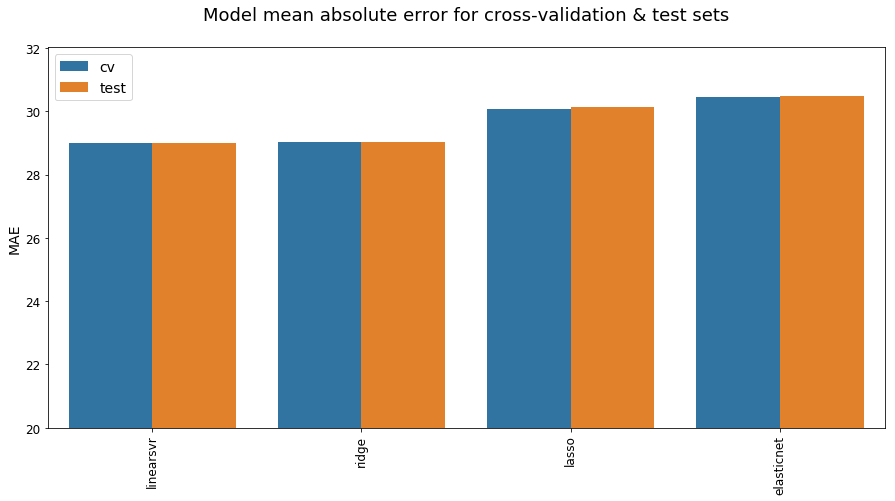

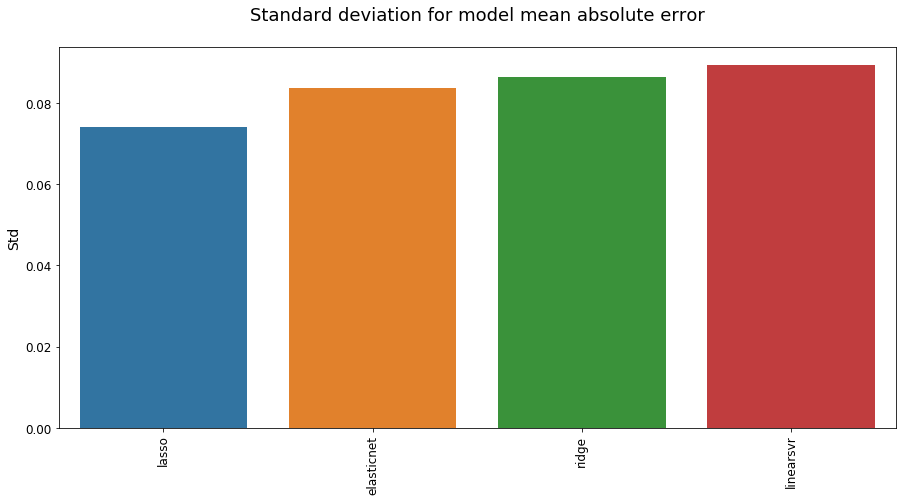

In [7]:
# MAE scores
mae_scores = estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=mae_scores)
plt.ylim(20)
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
std_scores = mae_scores[mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=std_scores)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

plt.show()

In [8]:
lsvr = make_pipeline(StandardScaler(), LinearSVR())

predictions = []
years = []

for year in range(1966, 2017):
    X_train = player_features[player_features['year'] < year]
    X_test = player_features[player_features['year'] == year]
    y_train = player_labels.loc[X_train.index]
    y_test = player_labels.loc[X_test.index]
    
    lsvr.fit(X_train, y_train)
    predictions.extend(lsvr.predict(X_test))

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
player_ratings = pd.Series(predictions, index=player_features[(player_features['year'] >= 1966) & (player_features['year'] <= 2016)].index)
player_ratings

id
1000108421995   -26.082803
1000108591995   -38.465084
1000108721995   -53.316471
1000109041995   -40.124791
1000109111995     7.060670
1000110021996    13.935083
1000110081996   -50.762624
1000110251996    14.120505
1000110281996    -4.828706
1000110561996    19.696238
1000110811996     7.340399
1000110971996     2.305917
1000111131996    53.092549
1000111281996    49.749260
1000111391996    10.355006
1000111611996    28.899538
1000111661996    36.285229
1000111711996   -44.087498
1000111891997   -39.682041
1000112191997   -31.128374
1000112401997   -32.602526
1000112611997    17.238547
1000112761997    19.422086
1000112911997   -11.503366
1000112971997    34.077179
1000113041997   -10.608145
1000113231997   -33.134694
1000113311997     9.202368
1000113451997   -23.347171
1000113701998    14.115927
                   ...    
9993391985       -5.801460
9993441985      -45.813284
9993471985      -40.601126
9993581986      -30.181080
9993721986      -17.210247
9993831986      -52.58829

The idea is to use a regressor to predict match margins based on each individual player's in-game stats (rolling mean) and use the sum of these predictions as a player rating feature.

# Aggregate player ratings for team predictions

In [10]:
MATCH_STATS_COLS = ['at_home', 'score', 'oppo_score']

def oppo_features(data_frame):
    column_translations = {'oppo_team': 'team',
                           'last_week_player_rating': 'oppo_last_week_player_rating',
                           'rolling_last_week_player_rating': 'oppo_rolling_last_week_player_rating'}

    return (data_frame
            .loc[:, ['year', 'round_number', 'oppo_team', 'last_week_player_rating', 'rolling_last_week_player_rating']]
            # We switch out oppo_team for team in the index,
            # then assign feature as oppo_{feature_column}
            .rename(columns=column_translations)
            .set_index(['team', 'year', 'round_number'])
            .sort_index()
            .loc[:, ['oppo_last_week_player_rating', 'oppo_rolling_last_week_player_rating']])

player_aggs = {'last_week_player_rating': 'sum', 'rolling_last_week_player_rating': 'sum'}
# Since match stats are the same across player rows, taking the mean
# is the easiest way to aggregate them
match_aggs = {col: 'mean' for col in MATCH_STATS_COLS}

aggregations = {**player_aggs, **match_aggs}

rating_df = (pd
             .concat([player_df[['team', 'year', 'round_number', 'oppo_team', 'score', 'oppo_score',
                                 'at_home', 'player_id']],
                       player_ratings.rename('player_rating')], axis=1, sort=True)
             .dropna()
             .assign(last_week_player_rating=(lambda x: x
                                                        .sort_values(['player_id', 'year', 'round_number'])
                                                        .groupby('player_id')
                                                        ['player_rating']
                                                        .shift()
                                                        .fillna(0)))
            .drop('player_rating', axis=1))

player_groups = rating_df[['player_id', 'last_week_player_rating']].groupby('player_id', group_keys=False)

rolling_stats = player_groups.rolling(window=23).mean()
expanding_stats = player_groups.expanding(1).mean()
expanding_rolling_stats = rolling_stats.fillna(expanding_stats).sort_index()

rolling_rating_df = (rating_df
                     .assign(rolling_last_week_player_rating=expanding_rolling_stats['last_week_player_rating'])
                     .groupby(['team', 'year', 'round_number', 'oppo_team'])
                     .aggregate(aggregations)
                     .reset_index()
                     .drop_duplicates(subset=['team', 'year', 'round_number'])
                     .set_index(['team', 'year', 'round_number'], drop=False))

rating_model_df = pd.concat([rolling_rating_df, oppo_features(rolling_rating_df)], axis=1, sort=True)
rating_model_df

team  year  round_number  \
team             year round_number                                         
Adelaide         1991 1                     Adelaide  1991             1   
                      2                     Adelaide  1991             2   
                      3                     Adelaide  1991             3   
                      4                     Adelaide  1991             4   
                      5                     Adelaide  1991             5   
                      6                     Adelaide  1991             6   
                      7                     Adelaide  1991             7   
                      9                     Adelaide  1991             9   
                      10                    Adelaide  1991            10   
                      11                    Adelaide  1991            11   
                      12                    Adelaide  1991            12   
                      13                    Adelaide  1991            13   
                      14                    Adelaide  1991            14   
                      15                    Adelaide  1991            15   
                      16                    Adelaide  1991            16   
                      17                    Adelaide  1991            17   
                      18                    Adelaide  1991            18   
                      19                    Adelaide  1991            19   
                      20                    Adelaide  1991            20   
                      21                    Adelaide  1991            21   
                      22                    Adelaide  1991            22   
                      24                    Adelaide  1991            24   
                 1992 1                     Adelaide  1992             1   
                      3                     Adelaide  1992             3   
                      4                     Adelaide  1992             4   
                      5                     Adelaide  1992             5   
                      6                     Adelaide  1992             6   
                      7                     Adelaide  1992             7   
                      8                     Adelaide  1992             8   
                      9                     Adelaide  1992             9   
...                                              ...   ...           ...   
Western Bulldogs 2015 21            Western Bulldogs  2015            21   
                      22            Western Bulldogs  2015            22   
                      23            Western Bulldogs  2015            23   
                      24            Western Bulldogs  2015            24   
                 2016 1             Western Bulldogs  2016             1   
                      2             Western Bulldogs  2016             2   
                      3             Western Bulldogs  2016             3   
                      4             Western Bulldogs  2016             4   
                      5             Western Bulldogs  2016             5   
                      6             Western Bulldogs  2016             6   
                      7             Western Bulldogs  2016             7   
                      8             Western Bulldogs  2016             8   
                      9             Western Bulldogs  2016             9   
                      10            Western Bulldogs  2016            10   
                      11            Western Bulldogs  2016            11   
                      12            Western Bulldogs  2016            12   
                      13            Western Bulldogs  2016            13   
                      15            Western Bulldogs  2016            15   
                      16            Western Bulldogs  2016            16   
                      17            Western Bulldogs  2016            17   
                    

In [11]:
# Set up & split data for models

model_features = pd.get_dummies(rating_model_df.drop(['score', 'oppo_score'], axis=1)).astype(float)
model_labels = pd.Series(rating_model_df['score'] - rating_model_df['oppo_score'], name='score_diff')
model_data = train_test_split(model_features, model_labels)

In [13]:
# Pass data to models & measure performance

model_estimators = (Lasso(),
                    ElasticNet(),
                    Ridge(),
                    LinearSVR(),
                    AdaBoostRegressor(n_estimators=100),
                    BaggingRegressor(),
                    ExtraTreesRegressor(n_estimators=100),
                    GradientBoostingRegressor(),
                    RandomForestRegressor(n_estimators=100),
                    SVR(kernel='rbf', gamma='auto'),
                    XGBRegressor())
model_pipelines = [make_pipeline(StandardScaler(), estimator) for estimator in model_estimators]

model_estimator_scores = measure_estimators(model_pipelines, model_data, model_type='regression')
model_estimator_scores

Training lasso
lasso done
Training elasticnet
elasticnet done
Training ridge
ridge done
Training linearsvr
linearsvr done
Training adaboostregressor
adaboostregressor done
Training baggingregressor
baggingregressor done
Training extratreesregressor
extratreesregressor done
Training gradientboostingregressor
gradientboostingregressor done
Training randomforestregressor
randomforestregressor done
Training svr
svr done
Training xgbregressor
xgbregressor done


,estimator,accuracy,error,std_accuracy,std_error,score_type
0,lasso,0.615219,33.892810,0.005184,0.463203,cv
1,elasticnet,0.619388,34.012047,0.002575,0.454458,cv
2,ridge,0.617383,33.640761,0.003201,0.363565,cv
3,linearsvr,0.619468,33.663453,0.004478,0.380010,cv
4,adaboostregressor,0.610409,34.470222,0.008394,0.551464,cv
5,baggingregressor,0.616742,34.529358,0.008579,0.370528,cv
6,extratreesregressor,0.635344,33.665540,0.007267,0.243685,cv
7,gradientboostingregressor,0.644324,32.756575,0.006407,0.440529,cv
8,randomforestregressor,0.640795,33.008183,0.012920,0.342429,cv
9,svr,0.619308,33.960131,0.005646,0.423340,cv


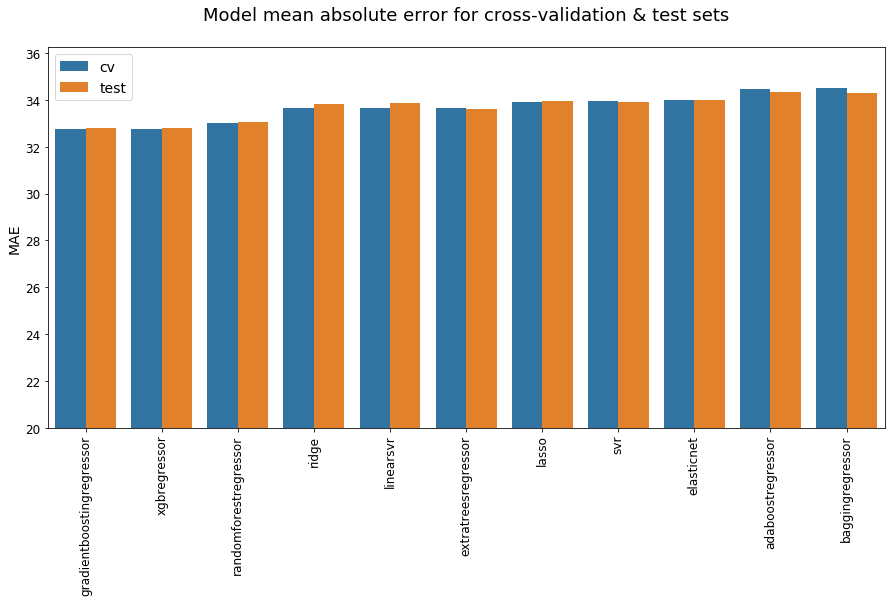

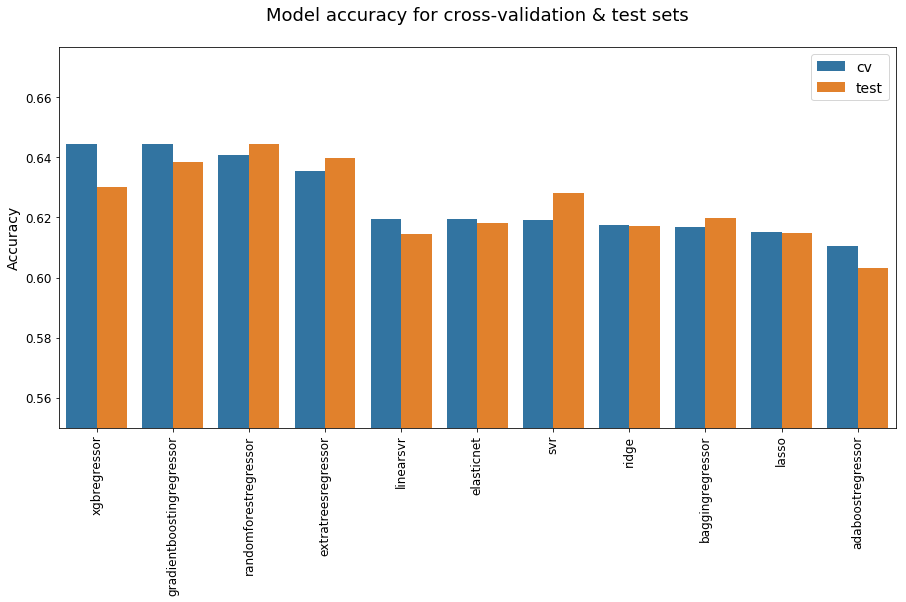

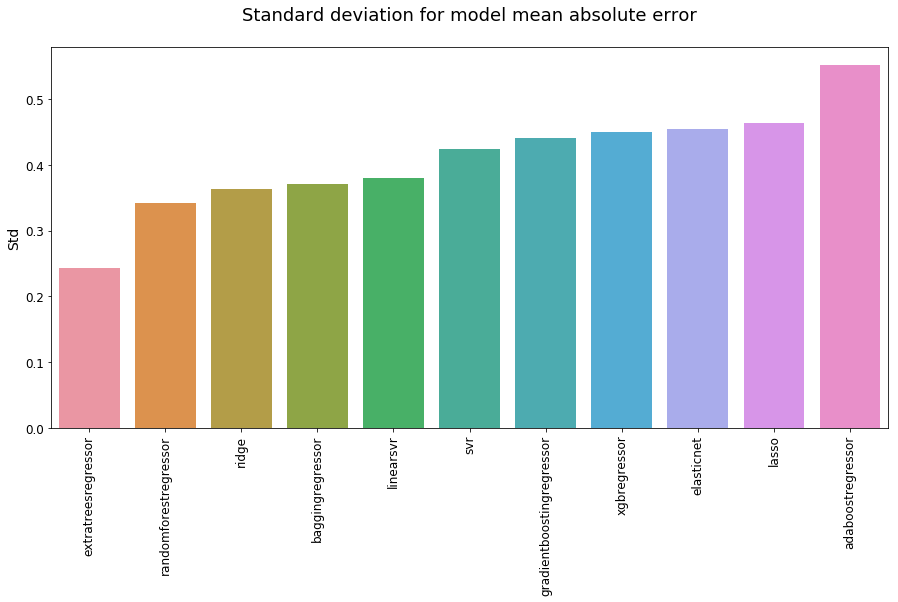

In [14]:
# MAE scores
model_mae_scores = model_estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=model_mae_scores)
plt.ylim(bottom=20)
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
model_acc_scores = model_estimator_scores.sort_values(['score_type', 'accuracy'], ascending=[True, False])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='accuracy', hue='score_type', data=model_acc_scores)
plt.ylim(bottom=0.55)
plt.title('Model accuracy for cross-validation & test sets\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
model_std_scores = model_mae_scores[model_mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=model_std_scores)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

plt.show()

# Stacked player-rating model underperforms

There might be some opportunity for tuning and making this better for predicting match margins, or adding it as a form of feature engineering to a more straightforward player data model, but I'm better off focusing my efforts elsewhere.